In [25]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure


In [26]:
# File to Load
Data_to_load = "Resources/final_data.csv"
flufighter_df = pd.read_csv(Data_to_load, low_memory=False,thousands=',')
flufighter_df.head()

,Unnamed: 0,US State Name,State_x,State_x.1,Month_x,Avg_temp,Density (Pop./ mi2),Population,sick death,all death,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Sick_death_rate(in 1000 people_wkly),All_death_rate(in 1000 people_wkly),sick of all death,GDP per capita
0,0,Alabama,AL,Alabama,January,45.525000,95.0,4858979,93.255814,1081.883721,0.24,0.09,0.11,0.26,0.14,0.17,0.019192,0.222657,0.086198,36404
1,1,Alaska,AK,Alaska,January,11.930000,1.0,738432,4.813953,82.255814,0.27,0.09,0.14,0.26,0.13,0.11,0.006519,0.111393,0.058524,69326
2,2,Arizona,AZ,Arizona,January,45.960000,60.0,6828065,90.232558,1099.395349,0.25,0.09,0.12,0.25,0.12,0.17,0.013215,0.161011,0.082075,38340
3,3,Arkansas,AR,Arkansas,January,40.433333,57.0,2978204,67.418605,660.209302,0.25,0.09,0.11,0.25,0.13,0.17,0.022637,0.221680,0.102117,35412
4,4,California,CA,California,January,49.237500,251.0,39144818,612.139535,5480.674419,0.24,0.10,0.14,0.27,0.12,0.14,0.015638,0.140010,0.111691,54232


In [27]:
# convert GDP data to numeric
pd.to_numeric(flufighter_df['GDP per capita'])
# group by state
grouped_df =flufighter_df.groupby(['US State Name'])
grouped_df

In [21]:
# define datapoints
GDP=grouped_df["GDP per capita"].mean()
avg_sick_death=grouped_df["Sick_death_rate(in 1000 people_wkly)"].mean()*52
avg_all_death=grouped_df["All_death_rate(in 1000 people_wkly)"].mean()*52

In [29]:
Viz_data=pd.DataFrame({
    "GDP per capita": GDP,
    "Annual Sick Death (per thousand people)": avg_sick_death,
"Annual All Death (per thousand people)": avg_all_death})
Viz_data.head()

,GDP per capita,Annual Sick Death (per thousand people),Annual All Death (per thousand people)
US State Name,,,
Alabama,36404,0.668389,10.395454
Alaska,69326,0.328839,5.529722
Arizona,38340,0.485091,7.647022
Arkansas,35412,0.812139,10.277937
California,54232,0.552163,6.400295


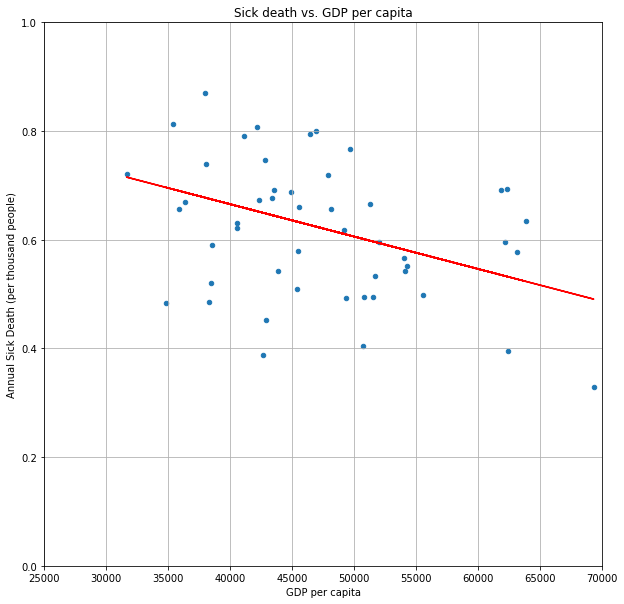

In [30]:

Viz_data.plot(kind="scatter", x="GDP per capita", y="Annual Sick Death (per thousand people)", grid=True, figsize=(10,10),
              title="Sick death vs. GDP per capita")

plt.ylim(0, 1)
plt.xlim(25000, 70000)


# calc the trendline
z = np.polyfit(Viz_data["GDP per capita"], Viz_data["Annual Sick Death (per thousand people)"], 1)
p = np.poly1d(z)
plt.plot(Viz_data["GDP per capita"],p(Viz_data["GDP per capita"]),"red")
plt.show()


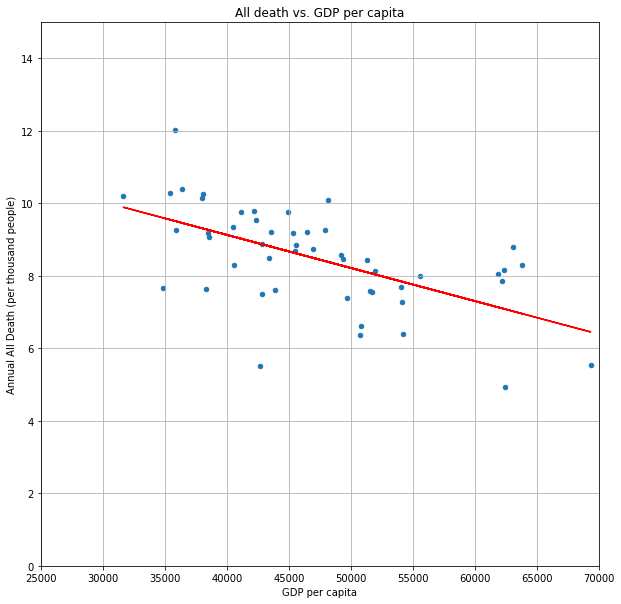

In [32]:

Viz_data.plot(kind="scatter", x="GDP per capita", y="Annual All Death (per thousand people)", grid=True, figsize=(10,10),
              title="All death vs. GDP per capita")

plt.ylim(0, 15)
plt.xlim(25000, 70000)


# calc the trendline
z = np.polyfit(Viz_data["GDP per capita"], Viz_data["Annual All Death (per thousand people)"], 1)
p = np.poly1d(z)
plt.plot(Viz_data["GDP per capita"],p(Viz_data["GDP per capita"]),"red")
plt.show()